# NEURAL NETWORK 

### 1) Dataset - forestfires

### Predict the burned area of forest fires with Neural Networks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential 
from keras.layers import Dense

In [2]:
data = pd.read_csv("forestfires.csv")

In [3]:
data[:3]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small


In [4]:
data.shape

(517, 31)

In [5]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
# Check and drop the duplicate values
data[data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
data[data.duplicated()].shape

(8, 31)

In [9]:
#drop the duplicate value
data1 = data.drop_duplicates()

In [10]:
data1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [11]:
data1.shape

(509, 31)

In [12]:
data2=data1.drop(data1.columns[10:30], axis=1)

In [13]:
data2.head(3)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,small


In [14]:
data2.shape

(509, 11)

In [15]:
# Convert the categoricalvalues of size_category column to integer
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data2["size_category"] = label_encoder.fit_transform(data2["size_category"])

In [17]:
data2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1


In [18]:
# Converting catergorical values of days and mothsinto into integers
data2.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace = True)
data2.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7),inplace = True)

In [19]:
data2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1


In [20]:
import warnings
warnings.filterwarnings("ignore")

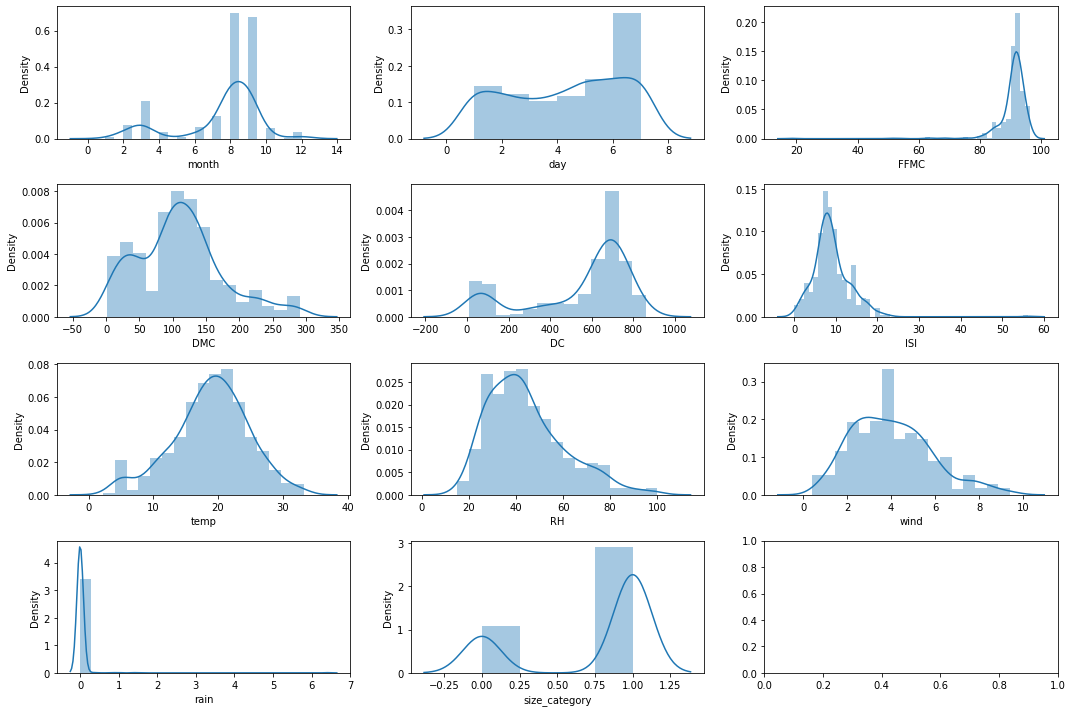

In [21]:
# Visualization using distplot
fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.distplot(data2.month, ax=ax[0,0])
sns.distplot(data2.day, ax=ax[0,1])
sns.distplot(data2.FFMC, ax=ax[0,2])
sns.distplot(data2.DMC, ax=ax[1,0])
sns.distplot(data2.DC, ax=ax[1,1])
sns.distplot(data2.ISI, ax=ax[1,2])
sns.distplot(data2.temp, ax=ax[2,0])
sns.distplot(data2.RH, ax=ax[2,1])
sns.distplot(data2.wind, ax=ax[2,2])
sns.distplot(data2.rain, ax=ax[3,0])
sns.distplot(data2['size_category'], ax=ax[3,1])

plt.tight_layout()
plt.show()

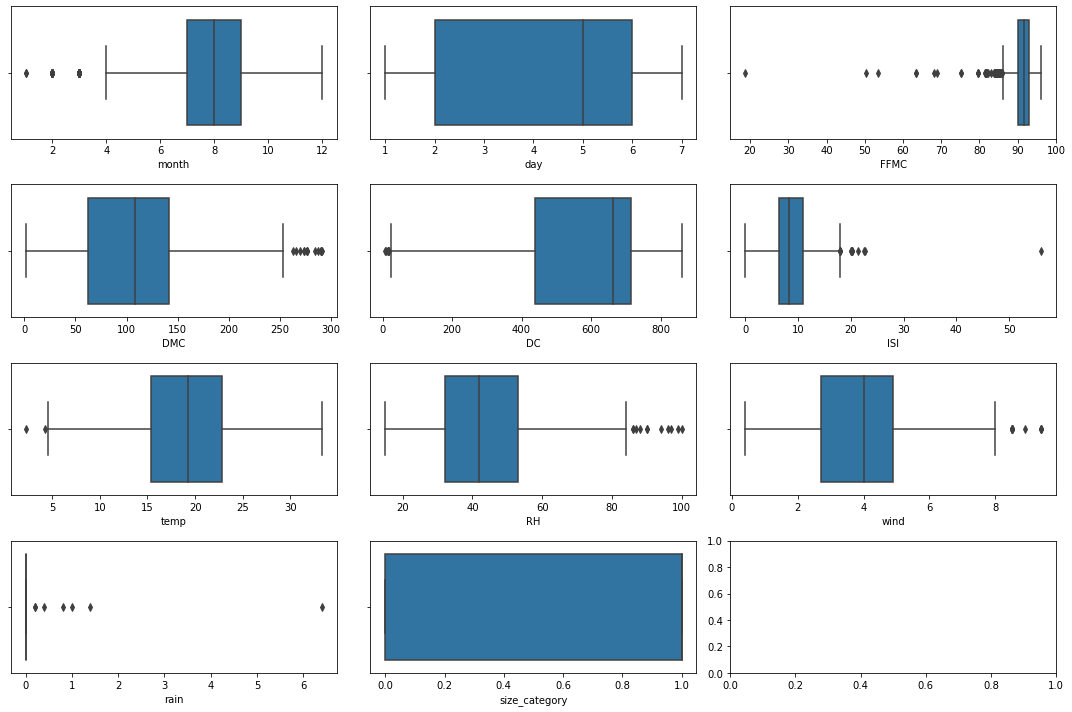

In [22]:
#Checking of the outlier
fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.boxplot(data2.month, ax=ax[0,0])
sns.boxplot(data2.day, ax=ax[0,1])
sns.boxplot(data2.FFMC, ax=ax[0,2])
sns.boxplot(data2.DMC, ax=ax[1,0])
sns.boxplot(data2.DC, ax=ax[1,1])
sns.boxplot(data2.ISI, ax=ax[1,2])
sns.boxplot(data2.temp, ax=ax[2,0])
sns.boxplot(data2.RH, ax=ax[2,1])
sns.boxplot(data2.wind, ax=ax[2,2])
sns.boxplot(data2.rain, ax=ax[3,0])
sns.boxplot(data2['size_category'], ax=ax[3,1])

plt.tight_layout()
plt.show()

# Extrating the independent and dependent variables

In [23]:
X = data2.iloc[:,0:10].values
Y = data2.iloc[:,-1].values

In [24]:
X

array([[ 3. ,  5. , 86.2, ..., 51. ,  6.7,  0. ],
       [10. ,  2. , 90.6, ..., 33. ,  0.9,  0. ],
       [10. ,  6. , 90.6, ..., 33. ,  1.3,  0. ],
       ...,
       [ 8. ,  7. , 81.6, ..., 70. ,  6.7,  0. ],
       [ 8. ,  6. , 94.4, ..., 42. ,  4. ,  0. ],
       [11. ,  2. , 79.5, ..., 31. ,  4.5,  0. ]])

In [26]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [27]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [28]:
# create model
model = Sequential()
model.add(Dense(12, input_dim = 10, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(8,  kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1,  kernel_initializer = 'uniform', activation = 'linear'))

In [29]:
# Compile model
model.compile(loss='mse', optimizer = 'adam', metrics = ['accuracy'])

In [30]:
# Fit the model
model.fit(X,Y, validation_split = 0.33, epochs=100, batch_size=10)

Epoch 1/100
35/35 [==============================] - 1s 10ms/step - loss: 0.4125 - accuracy: 0.4194 - val_loss: 0.3097 - val_accuracy: 0.6012
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 0.2321 - accuracy: 0.6510 - val_loss: 0.2728 - val_accuracy: 0.6012
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 0.2146 - accuracy: 0.6862 - val_loss: 0.2620 - val_accuracy: 0.6607
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1914 - accuracy: 0.7654 - val_loss: 0.2721 - val_accuracy: 0.6667
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1904 - accuracy: 0.7683 - val_loss: 0.2339 - val_accuracy: 0.6667
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1912 - accuracy: 0.7625 - val_loss: 0.2495 - val_accuracy: 0.6667
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1881 - accuracy: 0.7654 - val_loss: 0.2406 - val_accuracy: 0.6667
Epoch 8/100


Epoch 59/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1806 - accuracy: 0.7654 - val_loss: 0.2599 - val_accuracy: 0.6726
Epoch 60/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1824 - accuracy: 0.7625 - val_loss: 0.2333 - val_accuracy: 0.6667
Epoch 61/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1844 - accuracy: 0.7625 - val_loss: 0.2307 - val_accuracy: 0.6667
Epoch 62/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1829 - accuracy: 0.7683 - val_loss: 0.2279 - val_accuracy: 0.6667
Epoch 63/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1823 - accuracy: 0.7713 - val_loss: 0.2477 - val_accuracy: 0.6726
Epoch 64/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1870 - accuracy: 0.7654 - val_loss: 0.2261 - val_accuracy: 0.6667
Epoch 65/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1891 - accuracy: 0.7713 - val_loss: 0.2271 - val_accuracy: 0.6667
Epoch 

In [31]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]* scores[1]*100))

16/16 [==============================] - 0s 2ms/step - loss: 0.1960 - accuracy: 0.7387
accuracy: 54.57%


In [32]:
history = model.fit(X,Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1820 - accuracy: 0.7713 - val_loss: 0.2299 - val_accuracy: 0.6726
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1784 - accuracy: 0.7713 - val_loss: 0.2347 - val_accuracy: 0.6726
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1794 - accuracy: 0.7713 - val_loss: 0.2418 - val_accuracy: 0.6726
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1774 - accuracy: 0.7683 - val_loss: 0.2309 - val_accuracy: 0.6726
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1912 - accuracy: 0.7713 - val_loss: 0.2392 - val_accuracy: 0.6726
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1795 - accuracy: 0.7713 - val_loss: 0.2341 - val_accuracy: 0.6726
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1876 - accuracy: 0.7683 - val_loss: 0.2388 - val_accuracy: 0.6726
Epoch 8/100
3

35/35 [==============================] - 0s 3ms/step - loss: 0.1776 - accuracy: 0.7713 - val_loss: 0.2345 - val_accuracy: 0.6726
Epoch 59/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1760 - accuracy: 0.7713 - val_loss: 0.2383 - val_accuracy: 0.6726
Epoch 60/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1736 - accuracy: 0.7713 - val_loss: 0.2382 - val_accuracy: 0.6726
Epoch 61/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1727 - accuracy: 0.7713 - val_loss: 0.2348 - val_accuracy: 0.6726
Epoch 62/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1764 - accuracy: 0.7713 - val_loss: 0.2549 - val_accuracy: 0.6726
Epoch 63/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1779 - accuracy: 0.7713 - val_loss: 0.2645 - val_accuracy: 0.6726
Epoch 64/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1737 - accuracy: 0.7713 - val_loss: 0.2375 - val_accuracy: 0.6726
Epoch 65/100
35/35 

In [33]:
# Visualize training history

# list all data in history
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

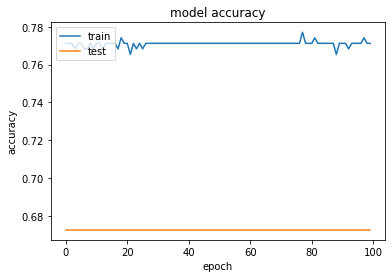

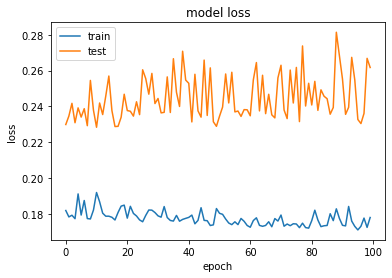

In [34]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

### 2) Dataset - gas_turbines

### Predicting turbine energy yield(TEY) using ambient variables as features.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential 
from keras.layers import Dense

In [38]:
data = pd.read_csv("gas_turbines.csv")

In [39]:
data[:3]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468


In [40]:
data.shape

(15039, 11)

In [41]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


### Check and drop the duplicate values


In [43]:
data[data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


### Check the distribution and outliers

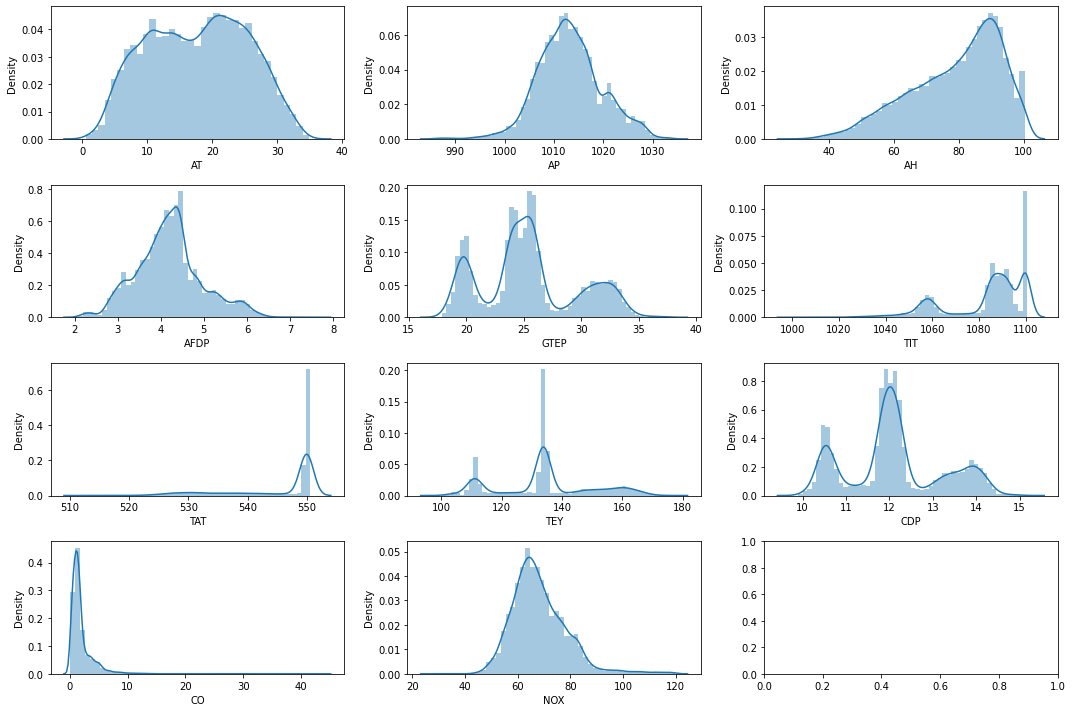

In [44]:
# Visualization using distplot
import warnings 
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.distplot(data.AT, ax=ax[0,0])
sns.distplot(data.AP, ax=ax[0,1])
sns.distplot(data.AH, ax=ax[0,2])
sns.distplot(data.AFDP, ax=ax[1,0])
sns.distplot(data.GTEP, ax=ax[1,1])
sns.distplot(data.TIT, ax=ax[1,2])
sns.distplot(data.TAT, ax=ax[2,0])
sns.distplot(data.TEY, ax=ax[2,1])
sns.distplot(data.CDP, ax=ax[2,2])
sns.distplot(data.CO, ax=ax[3,0])
sns.distplot(data.NOX, ax=ax[3,1])

plt.tight_layout()
plt.show()

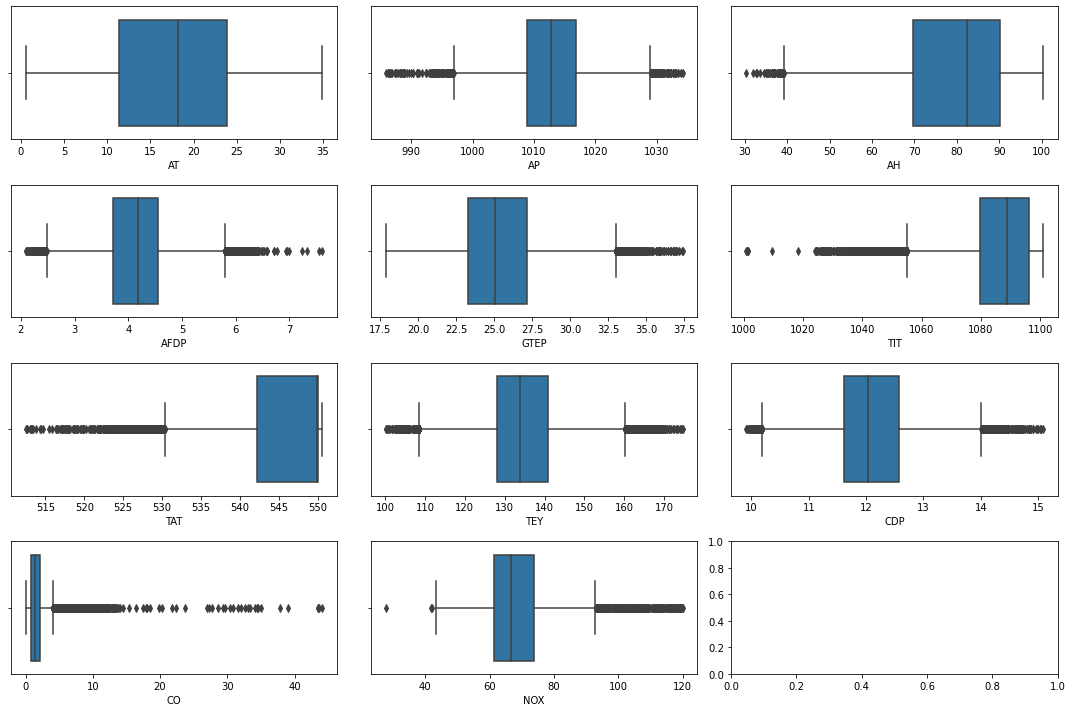

In [45]:
# Checking of outliers

fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.boxplot(data.AT, ax=ax[0,0])
sns.boxplot(data.AP, ax=ax[0,1])
sns.boxplot(data.AH, ax=ax[0,2])
sns.boxplot(data.AFDP, ax=ax[1,0])
sns.boxplot(data.GTEP, ax=ax[1,1])
sns.boxplot(data.TIT, ax=ax[1,2])
sns.boxplot(data.TAT, ax=ax[2,0])
sns.boxplot(data.TEY, ax=ax[2,1])
sns.boxplot(data.CDP, ax=ax[2,2])
sns.boxplot(data.CO, ax=ax[3,0])
sns.boxplot(data.NOX, ax=ax[3,1])

plt.tight_layout()
plt.show()

In [46]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
data1 = pd.DataFrame(scale.fit_transform(data),columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP','CO','NOX'])
data1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


### Extracting the independent and dependent variables

In [47]:
X = data1.drop(axis=0,columns="TEY").values
Y = data1["TEY"].values

In [48]:
X

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

In [49]:
Y

array([0.19519076, 0.19545943, 0.19532509, ..., 0.13460505, 0.14199355,
       0.15327781])

In [50]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [51]:
# create model
model = Sequential()
model.add(Dense(12, input_dim = 10, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(8,  kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1,  kernel_initializer = 'uniform', activation = 'linear'))

In [52]:
# compile model
model.compile(loss = 'mse', optimizer='adam', metrics=['accuracy'])

In [53]:
model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 3s 2ms/step - loss: 0.0344 - accuracy: 9.9246e-05 - val_loss: 6.2492e-04 - val_accuracy: 2.0149e-04
Epoch 2/100
1008/1008 [==============================] - 2s 2ms/step - loss: 6.0919e-04 - accuracy: 9.9246e-05 - val_loss: 3.0544e-04 - val_accuracy: 2.0149e-04
Epoch 3/100
1008/1008 [==============================] - 2s 2ms/step - loss: 2.6186e-04 - accuracy: 9.9246e-05 - val_loss: 2.2609e-04 - val_accuracy: 2.0149e-04
Epoch 4/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.8313e-04 - accuracy: 9.9246e-05 - val_loss: 1.7815e-04 - val_accuracy: 2.0149e-04
Epoch 5/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.5651e-04 - accuracy: 9.9246e-05 - val_loss: 1.3667e-04 - val_accuracy: 2.0149e-04
Epoch 6/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.4139e-04 - accuracy: 9.9246e-05 - val_loss: 1.2263e-04 - val_accuracy: 2.0149e-04
Epoch 7/100
1008/1008 [===============

1008/1008 [==============================] - 2s 2ms/step - loss: 1.1474e-04 - accuracy: 9.9246e-05 - val_loss: 1.0633e-04 - val_accuracy: 2.0149e-04
Epoch 52/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.1546e-04 - accuracy: 9.9246e-05 - val_loss: 1.3533e-04 - val_accuracy: 2.0149e-04
Epoch 53/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.1496e-04 - accuracy: 9.9246e-05 - val_loss: 1.0426e-04 - val_accuracy: 2.0149e-04
Epoch 54/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.1474e-04 - accuracy: 9.9246e-05 - val_loss: 1.5873e-04 - val_accuracy: 2.0149e-04
Epoch 55/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.1477e-04 - accuracy: 9.9246e-05 - val_loss: 1.0426e-04 - val_accuracy: 2.0149e-04
Epoch 56/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.1700e-04 - accuracy: 9.9246e-05 - val_loss: 1.2582e-04 - val_accuracy: 2.0149e-04
Epoch 57/100
1008/1008 [=================

In [54]:
# evaluate the model
scores = model.evaluate(X,Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 0s 735us/step - loss: 1.0972e-04 - accuracy: 1.3299e-04
accuracy: 0.01%


In [55]:
history = model.fit(X,Y, validation_split = 0.33, epochs=100, batch_size = 10)

Epoch 1/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.0863e-04 - accuracy: 9.9246e-05 - val_loss: 1.0053e-04 - val_accuracy: 2.0149e-04
Epoch 2/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.0801e-04 - accuracy: 9.9246e-05 - val_loss: 9.8073e-05 - val_accuracy: 2.0149e-04
Epoch 3/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.1051e-04 - accuracy: 9.9246e-05 - val_loss: 1.2654e-04 - val_accuracy: 2.0149e-04
Epoch 4/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.0860e-04 - accuracy: 9.9246e-05 - val_loss: 1.7124e-04 - val_accuracy: 2.0149e-04
Epoch 5/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.1069e-04 - accuracy: 9.9246e-05 - val_loss: 1.0529e-04 - val_accuracy: 2.0149e-04
Epoch 6/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.0977e-04 - accuracy: 9.9246e-05 - val_loss: 1.0035e-04 - val_accuracy: 2.0149e-04
Epoch 7/100
1008/1008 [===========

1008/1008 [==============================] - 1s 1ms/step - loss: 1.0492e-04 - accuracy: 9.9246e-05 - val_loss: 9.7062e-05 - val_accuracy: 2.0149e-04
Epoch 52/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.0612e-04 - accuracy: 9.9246e-05 - val_loss: 1.1032e-04 - val_accuracy: 2.0149e-04
Epoch 53/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.0876e-04 - accuracy: 9.9246e-05 - val_loss: 1.1748e-04 - val_accuracy: 2.0149e-04
Epoch 54/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.0445e-04 - accuracy: 9.9246e-05 - val_loss: 1.0896e-04 - val_accuracy: 2.0149e-04
Epoch 55/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.0502e-04 - accuracy: 9.9246e-05 - val_loss: 1.0585e-04 - val_accuracy: 2.0149e-04
Epoch 56/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.0716e-04 - accuracy: 9.9246e-05 - val_loss: 1.0132e-04 - val_accuracy: 2.0149e-04
Epoch 57/100
1008/1008 [=================

In [56]:
# Visualize training history
# list all data in history
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

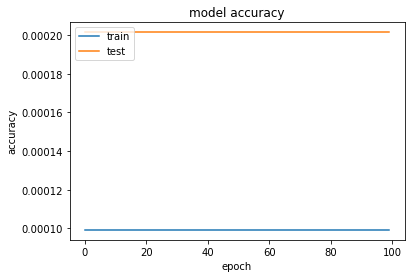

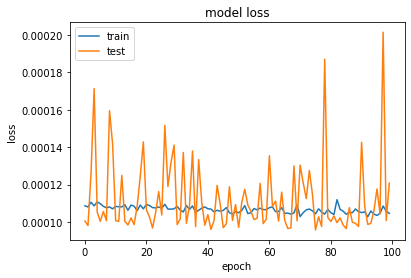

In [57]:
# Summarize history for accuracy
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()